In [2]:
from multiprocessing import Pool 
from random import uniform
from math import sqrt
from time import time
import numpy as np

## Simple

In [9]:
## SIMPLE
numbers = np.floor(np.logspace(1,7, num = 10))
pi_approxs = []
execution_times = []
simulation_rates = []

for n in numbers:
    number_of_darts = n.astype(int)
    number_of_darts_in_circle = 0

    start_time = time()
    for _ in range(number_of_darts):
        x, y = uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
            number_of_darts_in_circle += 1

    end_time = time()
    
    execution_time = end_time - start_time

    pi_approx = 4* (number_of_darts_in_circle / number_of_darts)
    pi_approxs.append(pi_approx)
    execution_times.append(execution_time)
    simulation_rates.append(number_of_darts/execution_time)

print('Pi approximation: ' + str(pi_approxs))
print('Number of Darts: '+ str(number_of_darts))
print('Execution Times(s)' + str(execution_times))
print('Darts Thrown per Second: '+ str(simulation_rates))




Pi approximation: [3.6000000000000001, 2.6956521739130435, 3.0697674418604652, 3.048, 3.138978668390433, 3.1401782398811733, 3.1292399999999998, 3.1417749990305026, 3.1411442634121074, 3.1421079999999999]
Number of Darts: 10000000
Execution Times(s)[0.0002028942108154297, 7.200241088867188e-05, 0.0002980232238769531, 0.001583099365234375, 0.0076999664306640625, 0.03701591491699219, 0.12714815139770508, 0.6745090484619141, 3.359292984008789, 15.675064086914062]
Darts Thrown per Second: [49286.768507638073, 638867.49668874172, 721420.28799999994, 631672.28915662656, 602729.90042110474, 582019.92435719073, 786484.10457192792, 688141.99165811273, 641335.54597819597, 637955.92442574131]


## Multiprocess with a pool of 4 worker processes

In [3]:
pool = Pool(processes  = 4)

In [8]:
numbers = np.floor(np.logspace(1,7, num = 10))
multi_pi_approxs = []
multi_execution_times = []
multi_simulation_rates = []



def dart(i):
    x, y = uniform(0,1), uniform(0,1)
    if sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5:
        return 1
    else:
        return 0

for n in numbers:
    number_of_darts = n.astype(int)
    number_of_darts_in_circle = 0

    start_time = time()
    number_of_darts_in_circle = np.sum(pool.map(dart,range(number_of_darts)))

    end_time = time()
    
    execution_time = end_time - start_time

    pi_approx = 4* (number_of_darts_in_circle / number_of_darts)
    multi_pi_approxs.append(pi_approx)
    multi_execution_times.append(execution_time)
    multi_simulation_rates.append(number_of_darts/execution_time)

print('Pi approximation: ' + str(multi_pi_approxs))
print('Number of Darts: '+ str(number_of_darts))
print('Execution Times(s)' + str(multi_execution_times))
print('Darts Thrown per Second: '+ str(multi_simulation_rates))


Pi approximation: [3.2000000000000002, 3.7391304347826089, 3.2186046511627908, 3.1480000000000001, 3.1251885369532428, 3.1427775714816191, 3.1469999999999998, 3.1472731268231939, 3.1432069861504228, 3.1420876]
Number of Darts: 10000000
Execution Times(s)[0.0055599212646484375, 0.003392934799194336, 0.003918170928955078, 0.004956960678100586, 0.016479015350341797, 0.024713993072509766, 0.08959794044494629, 0.3616969585418701, 2.0841798782348633, 8.858962059020996]
Darts Thrown per Second: [1798.5866209262435, 13557.584428360622, 54872.542290373618, 201736.52060987928, 281630.90459793399, 871732.86553859804, 1116097.0832967449, 1283278.6923926233, 1033708.281371873, 1128800.4095036276]


In [10]:
del pool

## Ipython Parallel with 8 controllers

In [12]:
import numpy as np
from time import time 
import ipyparallel as ipp
from ipyparallel import Client


rc = Client()
rc.block = True
rc.ids

[0, 1, 2, 3, 4, 5, 6, 7]

In [13]:
rc[:].apply_sync(lambda : "Hello, World")

['Hello, World',
 'Hello, World',
 'Hello, World',
 'Hello, World',
 'Hello, World',
 'Hello, World',
 'Hello, World',
 'Hello, World']

In [14]:
with rc[:].sync_imports():
    from math import sqrt
    from random import uniform 

numbers = np.floor(np.logspace(1,7, num = 10))
ipyp_pi_approxs = []
ipyp_execution_times = []
ipyp_simulation_rates = []

dview= rc[:]


def dart(i):
    x, y = uniform(0,1), uniform(0,1)
    if sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5:
        return 1
    else: 
        return 0 




for n in numbers:
    number_of_darts = n.astype(int)


    start_time = time()
    number_of_darts_in_circle = np.sum(dview.map(dart,range(number_of_darts)))
    # print(number_of_darts_in_circle, number_of_darts)

    end_time = time()
    
    execution_time = end_time - start_time

    pi_approx = 4* (number_of_darts_in_circle / number_of_darts)
    ipyp_pi_approxs.append(pi_approx)
    ipyp_execution_times.append(execution_time)
    ipyp_simulation_rates.append(number_of_darts/execution_time)

print('Pi approximation: ' + str(ipyp_pi_approxs))
print('Number of Darts: '+ str(number_of_darts))
print('Execution Times(s)' + str(ipyp_execution_times))
print('Darts Thrown per Second: '+ str(ipyp_simulation_rates))

importing sqrt from math on engine(s)
importing uniform from random on engine(s)
Pi approximation: [3.2000000000000002, 2.9565217391304346, 3.2372093023255815, 3.1800000000000002, 3.1355311355311355, 3.150018566654289, 3.1421199999999998, 3.1357856591936368, 3.1428579385583406, 3.1416632]
Number of Darts: 10000000
Execution Times(s)[0.03259897232055664, 0.025329113006591797, 0.02517104148864746, 0.031456947326660156, 0.028501033782958984, 0.06586194038391113, 0.10988092422485352, 0.43712806701660156, 1.9613959789276123, 8.715449094772339]
Darts Thrown per Second: [306.75813647334161, 1816.0920198045897, 8541.5615439261182, 31789.480066696982, 162836.19869167323, 327108.49201252509, 910076.07285288384, 1061835.2721386154, 1098418.6891103603, 1147387.8042610742]


In [15]:
numbers

array([  1.00000000e+01,   4.60000000e+01,   2.15000000e+02,
         1.00000000e+03,   4.64100000e+03,   2.15440000e+04,
         1.00000000e+05,   4.64158000e+05,   2.15443400e+06,
         1.00000000e+07])

## Plot

In [16]:
%matplotlib inline


import matplotlib.pyplot as plt

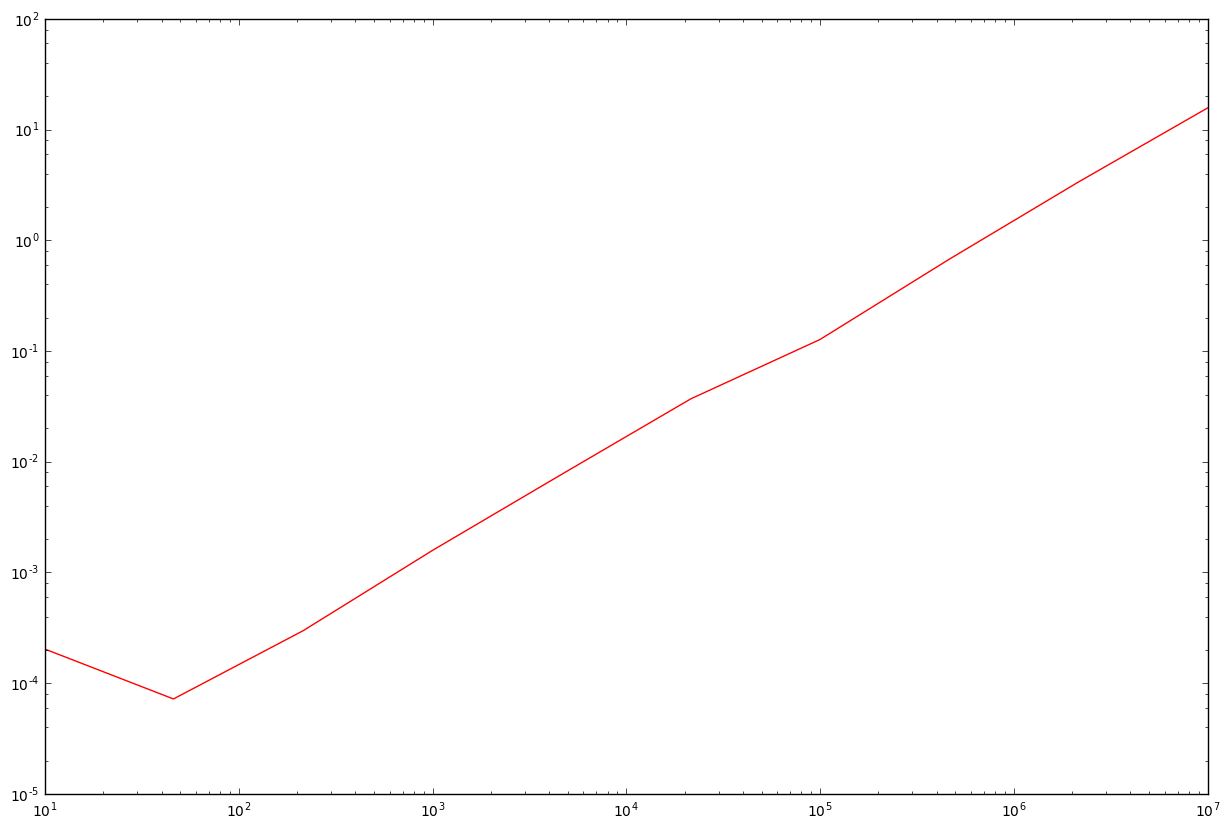

In [17]:

fig, ax1 = plt.subplots(figsize=(15,10))
ax1.loglog(numbers, execution_times,'red', label = 'Simple',basex = 10, basey=10)
#ax1.loglog(numbers, multi_execution_times,'blue', label ='Multiprocessing')
#ax1.loglog(numbers, ipyp_execution_times,'green', label = 'iPCluster')

#ax1.set_xlabel('Dart Thrown')
#ax1.set_ylabel('Execution Time(second), solid line')


#ax2 = ax1.twinx()
#ax2.plot(np.log(numbers), np.log(simulation_rates), 'r--')
#ax2.plot(np.log(numbers), np.log(multi_simulation_rates), 'b--')
#ax2.plot(np.log(numbers), np.log(ipyp_simulation_rates), 'g--',label = 'iPCluster')

#ax2.set_ylabel('Simulation Rate(darts/second), dashed line')
#xticks = np.linspace(2,18,9)


#ax1.xaxis.set_major_formatter(ScalarFormatter()) 
#ax1.set_xticklabels([10**x for x in xticks])

#ax1.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))


#ax1.legend(loc=2)


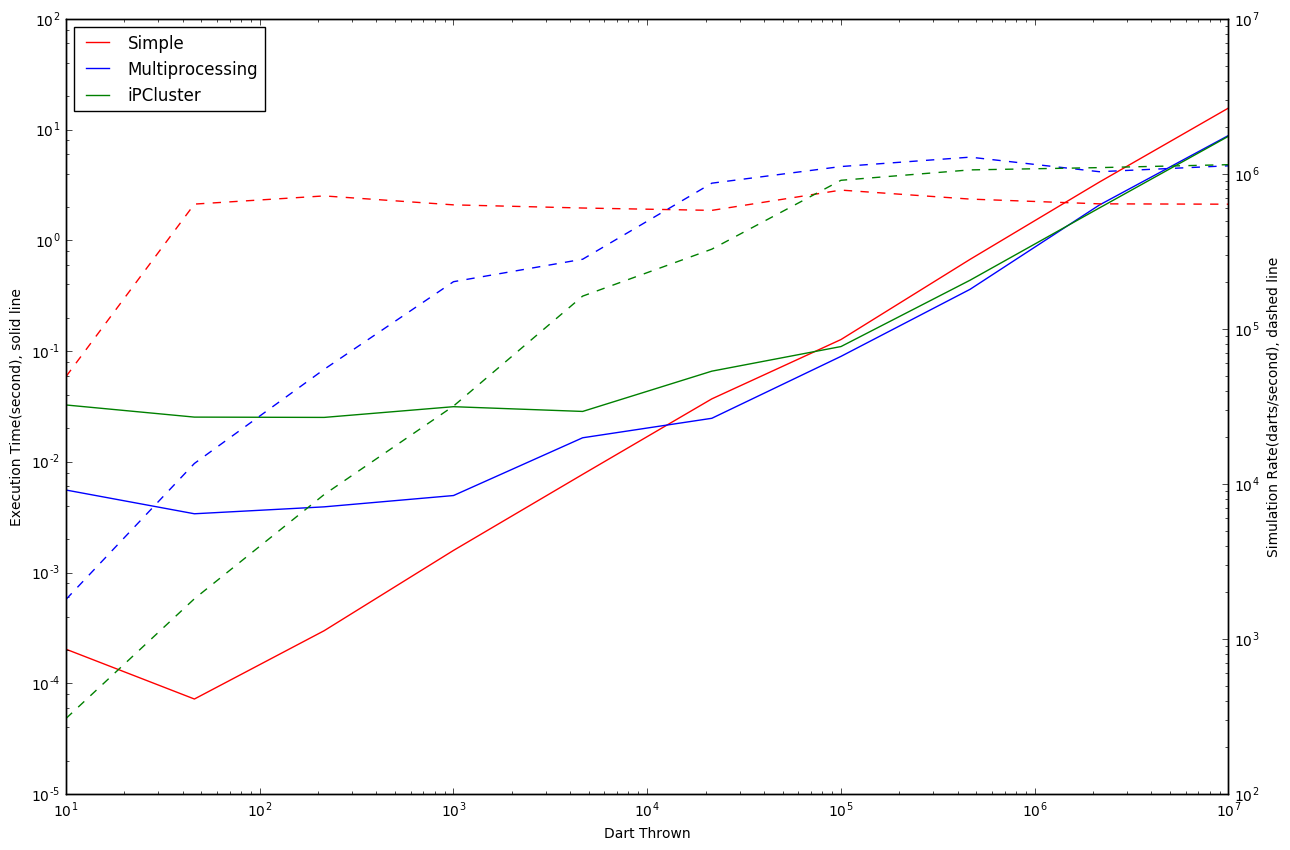

In [19]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax1.loglog(numbers, execution_times,'red', label = 'Simple',basex = 10, basey=10)
ax1.loglog(numbers, multi_execution_times,'blue', label ='Multiprocessing',basex = 10, basey=10)
ax1.loglog(numbers, ipyp_execution_times,'green', label = 'iPCluster',basex = 10, basey=10)

ax1.set_xlabel('Dart Thrown')
ax1.set_ylabel('Execution Time(second), solid line')


ax2 = ax1.twinx()
ax2.loglog(numbers, simulation_rates, 'r--',basex = 10, basey=10)
ax2.loglog(numbers, multi_simulation_rates, 'b--',basex = 10, basey=10)
ax2.loglog(numbers, ipyp_simulation_rates, 'g--',basex = 10, basey=10)

ax2.set_ylabel('Simulation Rate(darts/second), dashed line')




ax1.legend(loc=2)